# [BANA 212] Skytrax Airline Review Sentiment Prediction Project

## Group 12

## Part I . Web scrapping codes using Selenium

In [ ]:
#%pip install selenium

In [ ]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv
from math import ceil

In [ ]:
# Creates a new .csv file that the data will be written to
csv_file = open('ALL_airline_reviews.csv', 'w')
writer = csv.writer(csv_file)

# Define the variables (future data frame columns) to be scraped
writer.writerow(['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended'])

path = "/Users/peiliu/Downloads/chromedriver"
driver = webdriver.Chrome(path)
driver.get("https://www.airlinequality.com/")

In [ ]:
# All_airlines is a list of all the webpage endings corresponding to the pages for the airlines I want to get reviews for
ALL_airlines = ["alaska-airlines/", "allegiant-air/", "american-airlines/", 
               "delta-air-lines/", "frontier-airlines/", "hawaiian-airlines/", 
               "jetblue-airways/", "southwest-airlines", "spirit-airlines/", 
               "united-airlines/", "virgin-america/", "british-airways/", 
               "klm-royal-dutch-airlines/", "lufthansa/", "virgin-america/", "xiamen-airlines/"]

# Get the actual URLs with a list comprehension using the above list
ALL_airline_pages = ["http://www.airlinequality.com/airline-reviews/" + airline for airline in ALL_airlines]
#driver.get("http://www.airlinequality.com/review-pages/a-z-airline-reviews/")

In [ ]:
# This outer 'for loop' iterates through the different airline websites
# The sleep time has been set to 10secs since loading entirely new pages has proven to take longer
# than iterating through the pages of reviews within a single airline
for page in ALL _airline_pages:
    driver.get(page)
    time.sleep(10)
    try:
        print("="*40)   #Shows in terminal when a new airline is being scraped 
        print("Scraping " + page)

# Find total number of reviews for the airline
# Turn value into a float
# Each page defaults to showing 10 reviews, so take the ceiling of the total number of reviews divided by 10 
# to get the number of pages of reviews for the airline
        review_count = driver.find_element_by_xpath('//div[@class = "rating-totals"]//span[@itemprop = "reviewCount"]').text
        review_count = float(review_count)
        n = int(ceil(review_count/10))

        # Iterate through all the pages of reviews for the airline in question
        index = 1
        while index <= n:
            driver.get(page + "page/" + str(index) +'/')
            time.sleep(5)

            try:
                print("Scraping Page number " + str(index)) 	# Shows in terminal when a new page of reviews is being scraped
                index = index + 1

               #Find all the reviews:
                reviews = driver.find_elements_by_xpath('//article[@itemprop = "review"]')
                for review in reviews:

                    # Initialize an empty dictionary for each review
                    review_dict = {}

# Find xpaths of the fields desired as columns in future data frame
# We use the try/except statements to account for the fact that the reviews are not required to have 
# all the fields listed below, and if a review does not have a certain field we wish to make the 
# corresponding field blank in that particular row, rather than quit upon receiving an error. 
                    try:
                        airline = review.find_element_by_xpath('//div[@class = "review-heading"]//h1[@itemprop = "name"]').text
                    except:
                        airline = page
                    try:
                        overall = review.find_element_by_xpath('.//span[@itemprop = "ratingValue"]').text
                    except: 
                        overall = ""
                    try:
                        author = review.find_element_by_xpath('.//h3[@class = "text_sub_header userStatusWrapper"]//span[@itemprop = "name"]').text
                    except:
                        author = ""
                    try:
                        review_date = review.find_element_by_xpath('.//time[@itemprop = "datePublished"]').text
                    except:
                        review_date = ""
                    try:
                        customer_review = review.find_element_by_xpath('.//div[@itemprop = "reviewBody"]').text
                    except: 
                        customer_review = ""
                    try:
                        aircraft_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header aircraft "]')
                        aircraft = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header aircraft "]/following-sibling::td').text
                    except:
                        aircraft = ""
                    try:
                        traveller_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header type_of_traveller "]')
                        traveller_type = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header type_of_traveller "]/following-sibling::td').text
                    except:
                        traveller_type = ""
                    try:
                        cabin_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header cabin_flown "]')
                        cabin = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header cabin_flown "]/following-sibling::td').text
                    except:
                        cabin = ""
                    try:
                        route_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header route "]')
                        route = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header route "]/following-sibling::td').text
                    except:
                        route = ""
                    try:
                        date_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header date_flown "]')
                        date_flown = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header date_flown "]/following-sibling::td').text
                    except:
                        date_flown = ""
                    try:
                        seat_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header seat_comfort"]')
                        seat_comfort = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header seat_comfort"]/following-sibling::td/span[@class = "star fill"][last()]').text
                    except:
                        seat_comfort = ""
                    try:
                        cabin_service_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header cabin_staff_service"]')
                        cabin_service = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header cabin_staff_service"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        cabin_service = ""
                    try:
                        food_bev_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header food_and_beverages"]')
                        food_bev = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header food_and_beverages"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        food_bev = ""
                    try:
                        entertainment_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header inflight_entertainment"]')
                        entertainment = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header inflight_entertainment"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        entertainment = ""
                    try:
                        ground_service_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header ground_service"]')
                        ground_service = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header ground_service"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        ground_service = ""
                    try:
                        wifi_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header wifi_and_connectivity"]')
                        wifi = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header wifi_and_connectivity"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        wifi = ""
                    try:
                        value_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header value_for_money"]')
                        value_for_money = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header value_for_money"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        value_for_money = ""
                    try:
                        recommended_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header recommended"]')
                        recommended = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header recommended"]/following-sibling::td').text
                    except:
                        recommended = ""

# Write the results of the above to a dictionary. Note that each overall review will have its
# own dictionary, but all dictionaries for all the rows will all have the same keys. This
# allows Selenium to write the contents of these dictionaries into a coherent .csv file
                    review_dict['airline'] = airline
                    review_dict['overall'] = overall
                    review_dict['author'] = author
                    review_dict['review_date'] = review_date
                    review_dict['customer_review'] = customer_review
                    review_dict['aircraft'] = aircraft
                    review_dict['traveller_type'] = traveller_type
                    review_dict['cabin'] = cabin
                    review_dict['route'] = route
                    review_dict['date_flown'] = date_flown
                    review_dict['seat_comfort'] = seat_comfort
                    review_dict['cabin_service'] = cabin_service
                    review_dict['food_bev'] = food_bev
                    review_dict['entertainment'] = entertainment
                    review_dict['ground_service'] = ground_service
                    review_dict['value_for_money'] = value_for_money
                    review_dict['recommended'] = recommended
                    writer.writerow(review_dict.values())

# If an error is thrown unrelated to the above variables, print the error to the terminal
# console, close the .csv file, and break the while loop.
            except Exception as e:
                print(e)
                csv_file.close()
                #driver.close()
                break
                
    # If an error is thrown between airline pages, print the error to the terminal
    # console, close the .csv file, and break the while loop.
    except Exception as e:
                print(e)
                sv_file.close()
                #driver.close()
                break


In [ ]:
# close files and quit driver
csv_file.close()
driver.close()
driver.quit()

## Part II EDA & Sentiment Analysis 

In [53]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

#%pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
#from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import NMF, LatentDirichletAllocation

#%pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

#%pip install nltk
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
#nltk.downloader.download('vader_lexicon')
from nltk.probability import FreqDist
from nltk.corpus import stopwords
#nltk.download('stopwords')

#%pip install logging
import logging

#%pip install gensim
#from gensim.models import word2vec
#from gensim.models import Word2Vec
#from gensim.models.keyedvectors import KeyedVectors
#from keras.layers.embeddings import Embedding


#%pip install textblob
#from textblob import TextBlob

#from scipy.sparse import hstack, csr_matrix
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
import numpy as np
np.random.seed(2018)
import nltk
#nltk.download('wordnet')


## 1. Getting started

In [2]:
df = pd.read_csv("Airline_reviews.csv")

In [3]:
df.head(5)

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,1,British Airways,9.0,Victoria Huber,22nd October 2020,Not Verified | Overall I have to say I am real...,NaN,Solo Leisure,Economy Class,London to Venice,20-Oct,5.0,4.0,3.0,NaN,3.0,5.0,yes
1,2,British Airways,10.0,L Roberts,22nd October 2020,✅ Trip Verified | I am extremely pleased with ...,NaN,Couple Leisure,Economy Class,Munich to London,19-Nov,5.0,5.0,5.0,5.0,5.0,5.0,yes
2,3,British Airways,5.0,Gururaj Bolugallu,5th October 2020,✅ Trip Verified | Boarding and checkin formali...,NaN,Family Leisure,Economy Class,London to Bangalore,20-Oct,5.0,5.0,1.0,5.0,5.0,2.0,no
3,4,British Airways,10.0,Mateusz Walter,23rd September 2020,✅ Trip Verified | I have always had great flig...,A320neo,Solo Leisure,Business Class,Warsaw to London-Heathrow,20-Sep,5.0,5.0,5.0,5.0,4.0,5.0,yes
4,5,British Airways,1.0,Léa Chadfeau,18th September 2020,✅ Trip Verified | We had a flight to Santorini...,A321,Couple Leisure,Economy Class,London to Santorini,20-Aug,4.0,4.0,3.0,NaN,1.0,2.0,no


In [4]:
df.shape

(24007, 18)

In [5]:
pd.to_numeric(df['overall'])

0         9.0
1        10.0
2         5.0
3        10.0
4         1.0
         ... 
24002     2.0
24003     9.0
24004     9.0
24005     1.0
24006     2.0
Name: overall, Length: 24007, dtype: float64

In [6]:
df.dtypes

Unnamed: 0           int64
airline             object
overall            float64
author              object
review_date         object
customer_review     object
aircraft            object
traveller_type      object
cabin               object
route               object
date_flown          object
seat_comfort       float64
cabin_service      float64
food_bev           float64
entertainment      float64
ground_service     float64
value_for_money    float64
recommended         object
dtype: object

In [7]:
# let's see the overall stars rating
df.overall.value_counts()

1.0     10673
2.0      2483
10.0     2273
9.0      1672
8.0      1605
3.0      1449
7.0      1093
5.0       807
4.0       767
6.0       607
Name: overall, dtype: int64

Text(0, 0.5, 'Count')

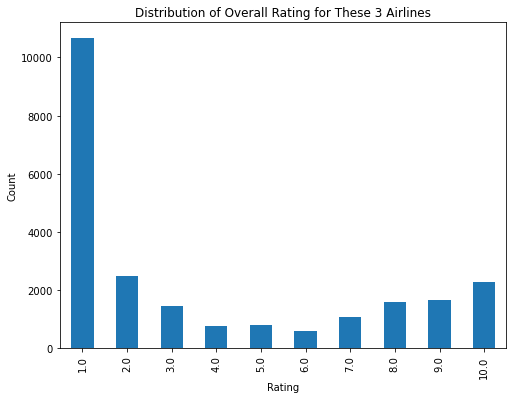

In [8]:
# plotting it for the visual
plt.figure(figsize=(8,6))
df['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Overall Rating for These 3 Airlines')
plt.xlabel('Rating')
plt.ylabel('Count')

In [9]:
print(df.columns.tolist())

['Unnamed: 0', 'airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']


# 2. Text Mining & Generating variables:

## 2.1. Generating [reviews_only] & [trip verified]


In [10]:
df['delimiter'] = df['customer_review'].str.contains('|') 
df.head() 

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,delimiter
0,1,British Airways,9.0,Victoria Huber,22nd October 2020,Not Verified | Overall I have to say I am real...,NaN,Solo Leisure,Economy Class,London to Venice,20-Oct,5.0,4.0,3.0,NaN,3.0,5.0,yes,True
1,2,British Airways,10.0,L Roberts,22nd October 2020,✅ Trip Verified | I am extremely pleased with ...,NaN,Couple Leisure,Economy Class,Munich to London,19-Nov,5.0,5.0,5.0,5.0,5.0,5.0,yes,True
2,3,British Airways,5.0,Gururaj Bolugallu,5th October 2020,✅ Trip Verified | Boarding and checkin formali...,NaN,Family Leisure,Economy Class,London to Bangalore,20-Oct,5.0,5.0,1.0,5.0,5.0,2.0,no,True
3,4,British Airways,10.0,Mateusz Walter,23rd September 2020,✅ Trip Verified | I have always had great flig...,A320neo,Solo Leisure,Business Class,Warsaw to London-Heathrow,20-Sep,5.0,5.0,5.0,5.0,4.0,5.0,yes,True
4,5,British Airways,1.0,Léa Chadfeau,18th September 2020,✅ Trip Verified | We had a flight to Santorini...,A321,Couple Leisure,Economy Class,London to Santorini,20-Aug,4.0,4.0,3.0,NaN,1.0,2.0,no,True


In [11]:
df['customer_review'][0]

"Not Verified | Overall I have to say I am really pleased with the service BA provided, given the circumstances which must be particularly challenging for airlines. I had to call BA a few times regarding both my outbound and return flight and I would rate their customer service 10/10. Everyone I talked to was extremely friendly and helpful, one employee even tried to help me figure out the recently updated arrival regulations from an Italian website and listened to my rant about constantly changing restrictions and quarantines. I was refunded promptly for part of my flight that had been cancelled and I was able to change my return flight to a completely different route and date with only a minimal charge. They have really shown flexibility here, which is needed when travelling in 2020. The flight itself was fine and I appreciate that food and drink options are currently a bit limited, given that everyone should wear their mask as much as possible rather than sipping tea. The one thing 

In [12]:
# get strings after "|" symbol
df['reviews_only'] = df['customer_review'].str.split('|').str[1]

In [13]:
df.head(5)

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,delimiter,reviews_only
0,1,British Airways,9.0,Victoria Huber,22nd October 2020,Not Verified | Overall I have to say I am real...,NaN,Solo Leisure,Economy Class,London to Venice,20-Oct,5.0,4.0,3.0,NaN,3.0,5.0,yes,True,Overall I have to say I am really pleased wit...
1,2,British Airways,10.0,L Roberts,22nd October 2020,✅ Trip Verified | I am extremely pleased with ...,NaN,Couple Leisure,Economy Class,Munich to London,19-Nov,5.0,5.0,5.0,5.0,5.0,5.0,yes,True,I am extremely pleased with British Airways a...
2,3,British Airways,5.0,Gururaj Bolugallu,5th October 2020,✅ Trip Verified | Boarding and checkin formali...,NaN,Family Leisure,Economy Class,London to Bangalore,20-Oct,5.0,5.0,1.0,5.0,5.0,2.0,no,True,Boarding and checkin formalities are very nic...
3,4,British Airways,10.0,Mateusz Walter,23rd September 2020,✅ Trip Verified | I have always had great flig...,A320neo,Solo Leisure,Business Class,Warsaw to London-Heathrow,20-Sep,5.0,5.0,5.0,5.0,4.0,5.0,yes,True,I have always had great flights with British ...
4,5,British Airways,1.0,Léa Chadfeau,18th September 2020,✅ Trip Verified | We had a flight to Santorini...,A321,Couple Leisure,Economy Class,London to Santorini,20-Aug,4.0,4.0,3.0,NaN,1.0,2.0,no,True,We had a flight to Santorini from LHR at 8:10...


In [14]:
#remove the spaces at the beginning of string:
df['reviews_only'] = df['reviews_only'].str.lstrip()
df['reviews_only'].head(5)

0    Overall I have to say I am really pleased with...
1    I am extremely pleased with British Airways as...
2    Boarding and checkin formalities are very nice...
3    I have always had great flights with British A...
4    We had a flight to Santorini from LHR at 8:10a...
Name: reviews_only, dtype: object

In [15]:
# adding another variable 
df['Trip_Verified'] = df['customer_review'].str.split('|').str[0]
df.head(5)

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,...,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,delimiter,reviews_only,Trip_Verified
0,1,British Airways,9.0,Victoria Huber,22nd October 2020,Not Verified | Overall I have to say I am real...,NaN,Solo Leisure,Economy Class,London to Venice,...,5.0,4.0,3.0,NaN,3.0,5.0,yes,True,Overall I have to say I am really pleased with...,Not Verified
1,2,British Airways,10.0,L Roberts,22nd October 2020,✅ Trip Verified | I am extremely pleased with ...,NaN,Couple Leisure,Economy Class,Munich to London,...,5.0,5.0,5.0,5.0,5.0,5.0,yes,True,I am extremely pleased with British Airways as...,✅ Trip Verified
2,3,British Airways,5.0,Gururaj Bolugallu,5th October 2020,✅ Trip Verified | Boarding and checkin formali...,NaN,Family Leisure,Economy Class,London to Bangalore,...,5.0,5.0,1.0,5.0,5.0,2.0,no,True,Boarding and checkin formalities are very nice...,✅ Trip Verified
3,4,British Airways,10.0,Mateusz Walter,23rd September 2020,✅ Trip Verified | I have always had great flig...,A320neo,Solo Leisure,Business Class,Warsaw to London-Heathrow,...,5.0,5.0,5.0,5.0,4.0,5.0,yes,True,I have always had great flights with British A...,✅ Trip Verified
4,5,British Airways,1.0,Léa Chadfeau,18th September 2020,✅ Trip Verified | We had a flight to Santorini...,A321,Couple Leisure,Economy Class,London to Santorini,...,4.0,4.0,3.0,NaN,1.0,2.0,no,True,We had a flight to Santorini from LHR at 8:10a...,✅ Trip Verified


In [16]:
# check our cleaning 
df['reviews_only'].isnull().sum()

10116

In [17]:
# not all of the reviews text column were filled, we need to fix that
df.reviews_only[df.reviews_only.isnull()] = df.customer_review

<ipython-input-17-68c476e1586b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.reviews_only[df.reviews_only.isnull()] = df.customer_review


In [18]:
# check if all reviews text are being filled
df['reviews_only'].isnull().sum()

0

In [19]:
# check the transfer again 
empty_reviews = df.loc[df['reviews_only'].isnull()]
empty_reviews[['customer_review', 'reviews_only', 'Trip_Verified']]

,customer_review,reviews_only,Trip_Verified


## 2.3 [COVID_related] :

In [38]:
df['COVID_related'] = df['reviews_only'].str.contains('COVID|covid|mask|masks|pandemic')

In [43]:
df['COVID_related'].head()

df['COVID_related'] = np.where(df['COVID_related'] == True, 1, 0)

## 2.4 [sentiment] - satisfied or not

In [24]:
# Considering reviews with positive sentiment (rating = 8 ~10) and netrual or negative sentiment (rating = 1~7 )

# Encoding rating above 7s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['sentiment'] = np.where(df['overall'] > 7, 1, 0)
df.head()


,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,...,food_bev,entertainment,ground_service,value_for_money,recommended,delimiter,reviews_only,Trip_Verified,COVID_related,sentiment
0,1,British Airways,9.0,Victoria Huber,22nd October 2020,Not Verified | Overall I have to say I am real...,NaN,Solo Leisure,Economy Class,London to Venice,...,3.0,NaN,3.0,5.0,yes,True,Overall I have to say I am really pleased with...,Not Verified,1,1
1,2,British Airways,10.0,L Roberts,22nd October 2020,✅ Trip Verified | I am extremely pleased with ...,NaN,Couple Leisure,Economy Class,Munich to London,...,5.0,5.0,5.0,5.0,yes,True,I am extremely pleased with British Airways as...,✅ Trip Verified,0,1
2,3,British Airways,5.0,Gururaj Bolugallu,5th October 2020,✅ Trip Verified | Boarding and checkin formali...,NaN,Family Leisure,Economy Class,London to Bangalore,...,1.0,5.0,5.0,2.0,no,True,Boarding and checkin formalities are very nice...,✅ Trip Verified,0,0
3,4,British Airways,10.0,Mateusz Walter,23rd September 2020,✅ Trip Verified | I have always had great flig...,A320neo,Solo Leisure,Business Class,Warsaw to London-Heathrow,...,5.0,5.0,4.0,5.0,yes,True,I have always had great flights with British A...,✅ Trip Verified,0,1
4,5,British Airways,1.0,Léa Chadfeau,18th September 2020,✅ Trip Verified | We had a flight to Santorini...,A321,Couple Leisure,Economy Class,London to Santorini,...,3.0,NaN,1.0,2.0,no,True,We had a flight to Santorini from LHR at 8:10a...,✅ Trip Verified,0,0


## 2.3. Score reviews with VADER package:

#### Obtain columns: [pos], [neu], [neg], [compound]


In [25]:
# let's try it on one review
sid = SentimentIntensityAnalyzer()
sid.polarity_scores('Our flight attendants truly made an exceptional trip for us! We had to cut our honeymoon short due to complications with flights. They were able to help make it a fun and memorable night, getting us safely home. This was our first time flying with Alaska and we will be back.')

{'neg': 0.035, 'neu': 0.756, 'pos': 0.208, 'compound': 0.8832}

In [26]:
# trying another one
sid.polarity_scores('Albany to San Antonio. I will refuse to use Delta again. I had to cancel my flight due to the coronavirus and they only offered me an e-ticket for not even up to a full year later to use. I checked the dates for when the next time I could fly was and there was no option for Delta and they still refused to give me a full refund. As a healthcare provider, this enrages me that this company is this greedy and that in a time of need they could not give me back money for my flight. I will never use them again. The lady on the phone was rude and did not seem to care at all.')

{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.9524}

In [27]:
# apply it to the reviews_only column
df['neg'] = df['reviews_only'].apply(lambda x:sid.polarity_scores(str(x))['neg'])
df['neu'] = df['reviews_only'].apply(lambda x:sid.polarity_scores(str(x))['neu'])
df['pos'] = df['reviews_only'].apply(lambda x:sid.polarity_scores(str(x))['pos'])
df['compound'] = df['reviews_only'].apply(lambda x:sid.polarity_scores(str(x))['compound'])
# now we have scoring!
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,...,recommended,delimiter,reviews_only,Trip_Verified,COVID_related,sentiment,neg,neu,pos,compound
0,1,British Airways,9.0,Victoria Huber,22nd October 2020,Not Verified | Overall I have to say I am real...,NaN,Solo Leisure,Economy Class,London to Venice,...,yes,True,Overall I have to say I am really pleased with...,Not Verified,1,1,0.022,0.863,0.116,0.9792
1,2,British Airways,10.0,L Roberts,22nd October 2020,✅ Trip Verified | I am extremely pleased with ...,NaN,Couple Leisure,Economy Class,Munich to London,...,yes,True,I am extremely pleased with British Airways as...,✅ Trip Verified,0,1,0.065,0.671,0.265,0.9468
2,3,British Airways,5.0,Gururaj Bolugallu,5th October 2020,✅ Trip Verified | Boarding and checkin formali...,NaN,Family Leisure,Economy Class,London to Bangalore,...,no,True,Boarding and checkin formalities are very nice...,✅ Trip Verified,0,0,0.038,0.716,0.246,0.9051
3,4,British Airways,10.0,Mateusz Walter,23rd September 2020,✅ Trip Verified | I have always had great flig...,A320neo,Solo Leisure,Business Class,Warsaw to London-Heathrow,...,yes,True,I have always had great flights with British A...,✅ Trip Verified,0,1,0.026,0.672,0.302,0.9979
4,5,British Airways,1.0,Léa Chadfeau,18th September 2020,✅ Trip Verified | We had a flight to Santorini...,A321,Couple Leisure,Economy Class,London to Santorini,...,no,True,We had a flight to Santorini from LHR at 8:10a...,✅ Trip Verified,0,0,0.015,0.964,0.021,-0.0516


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


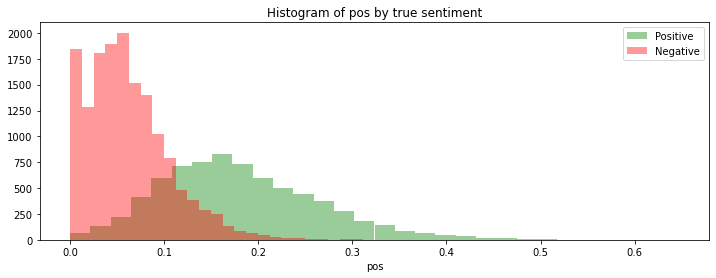

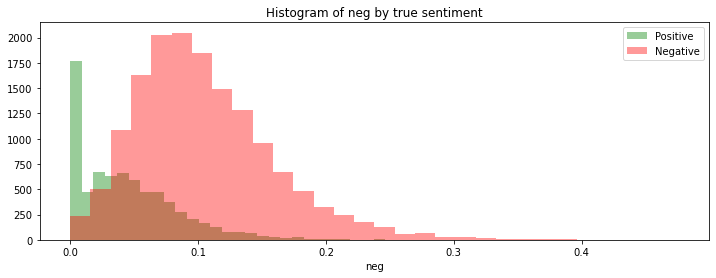

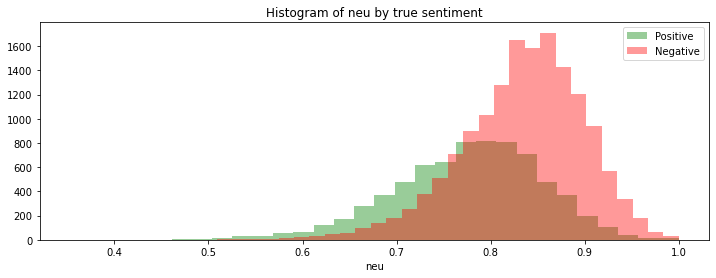

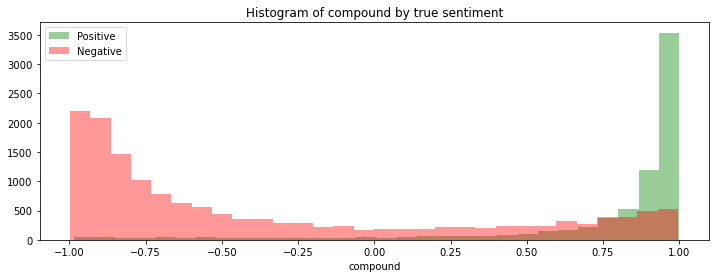

In [28]:
for var in ['pos', 'neg', 'neu', 'compound']:
    plt.figure(figsize=(12,4))
    sns.distplot(df.query('overall > 5')[var], bins=30, kde=False, 
                 color='green', label='Positive')
    sns.distplot(df.query('overall < 5')[var], bins=30, kde=False, 
                 color='red', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')

## 2.4. Score sentiment using Textblob :

#### obtain columns ['polarity'], ['subjectivity']

In [29]:
#%pip install TextBlob
from textblob import TextBlob

In [30]:
# trying it on one review
TextBlob('Albany to San Antonio. I will refuse to use Delta again. I had to cancel my flight due to the coronavirus and they only offered me an e-ticket for not even up to a full year later to use. I checked the dates for when the next time I could fly was and there was no option for Delta and they still refused to give me a full refund. As a healthcare provider, this enrages me that this company is this greedy and that in a time of need they could not give me back money for my flight. I will never use them again. The lady on the phone was rude and did not seem to care at all.').sentiment

Sentiment(polarity=0.11944444444444444, subjectivity=0.44166666666666665)

In [31]:
df['sentiment score'] = df['reviews_only'].apply(lambda x:TextBlob(str(x)).sentiment).tolist()

In [32]:
sentiment_series = df['sentiment score'].tolist()
sentiment_series = pd.DataFrame(sentiment_series, columns = ['polarity', 'subjectivity'], index = df.index)

In [33]:
df = pd.concat([df, sentiment_series], axis=1, join='outer')
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,...,Trip_Verified,COVID_related,sentiment,neg,neu,pos,compound,sentiment score,polarity,subjectivity
0,1,British Airways,9.0,Victoria Huber,22nd October 2020,Not Verified | Overall I have to say I am real...,NaN,Solo Leisure,Economy Class,London to Venice,...,Not Verified,1,1,0.022,0.863,0.116,0.9792,"(0.15844342439170023, 0.5125671742051052)",0.158443,0.512567
1,2,British Airways,10.0,L Roberts,22nd October 2020,✅ Trip Verified | I am extremely pleased with ...,NaN,Couple Leisure,Economy Class,Munich to London,...,✅ Trip Verified,0,1,0.065,0.671,0.265,0.9468,"(0.25303030303030305, 0.34545454545454546)",0.253030,0.345455
2,3,British Airways,5.0,Gururaj Bolugallu,5th October 2020,✅ Trip Verified | Boarding and checkin formali...,NaN,Family Leisure,Economy Class,London to Bangalore,...,✅ Trip Verified,0,0,0.038,0.716,0.246,0.9051,"(0.52, 0.825)",0.520000,0.825000
3,4,British Airways,10.0,Mateusz Walter,23rd September 2020,✅ Trip Verified | I have always had great flig...,A320neo,Solo Leisure,Business Class,Warsaw to London-Heathrow,...,✅ Trip Verified,0,1,0.026,0.672,0.302,0.9979,"(0.35213015873015885, 0.6018126984126984)",0.352130,0.601813
4,5,British Airways,1.0,Léa Chadfeau,18th September 2020,✅ Trip Verified | We had a flight to Santorini...,A321,Couple Leisure,Economy Class,London to Santorini,...,✅ Trip Verified,0,0,0.015,0.964,0.021,-0.0516,"(0.05714285714285714, 0.19642857142857145)",0.057143,0.196429


In [34]:
df['overall'].dtypes

dtype('float64')

In [35]:
df['overall'].astype(str)

0         9.0
1        10.0
2         5.0
3        10.0
4         1.0
         ... 
24002     2.0
24003     9.0
24004     9.0
24005     1.0
24006     2.0
Name: overall, Length: 24007, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


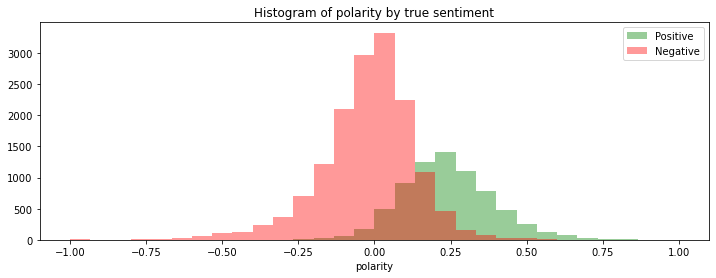

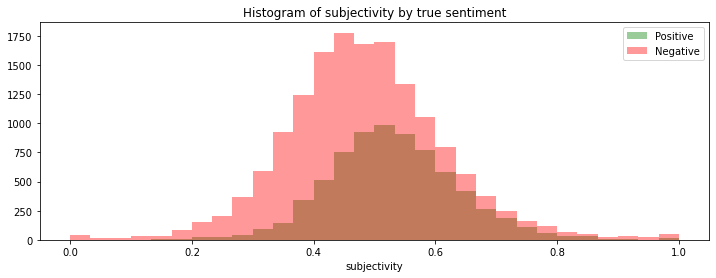

In [36]:
for var in ['polarity', 'subjectivity']:
    plt.figure(figsize=(12,4))
    sns.distplot(df.query("overall > 5")[var], bins=30, kde=False, 
                 color='green', label='Positive')
    sns.distplot(df.query("overall < 5")[var], bins=30, kde=False, 
                 color='red', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')

<AxesSubplot:>

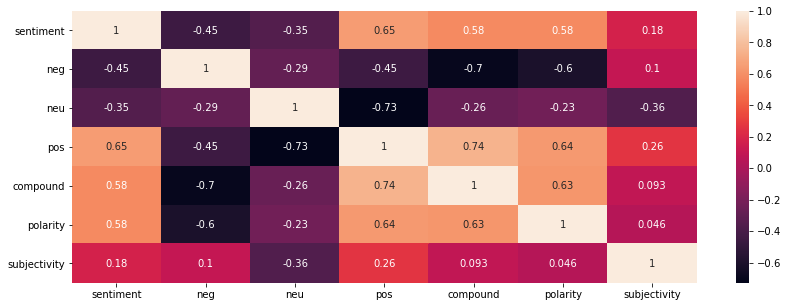

In [37]:
plt.figure(figsize = (14,5))
columns = ['sentiment', 'neg', 'neu', 'pos', 'compound', 'polarity', 'subjectivity']
#sns.heatmap(df[columns].corr(), annot=True, cmap='seismic_r')
sns.heatmap(df[columns].corr(), annot=True)

# 3. Perform LDA and word cloud on the reviews:

## 3.1. Perform LDA on the dissatisfied COVID related reviews 

### -- what's the top 5 topics among these reviews?

In [55]:
# filter for customers who mentioned COVID in their reviews, who is also unsatisfied with the service
covid_unhappy = df.loc[(df['COVID_related'] == 1) & (df['sentiment'] == 0)]
covid_unhappy = covid_unhappy.reset_index()
covid_unhappy['airline'].unique()

array(['British Airways', 'Lufthansa', 'KLM Royal Dutch Airlines',
       'Alaska Airlines', 'American Airlines', 'Allegiant Air',
       'Jetblue Airways', 'Spirit Airlines', 'Hawaiian Airlines',
       'United Airlines', 'Delta Air Lines', 'Frontier Airlines'],
      dtype=object)

In [ ]:
reviews = [];
for i in range(len(covid_unhappy.index)):
    reviews.append(covid_unhappy['reviews_only'][i].lower())
reviews  

from nltk.stem import LancasterStemmer
my_stemmer = LancasterStemmer()
stemmed = [[my_stemmer.stem(word) for word in review.split()] for review in reviews]

In [69]:
stemmed_combined = [" ".join(review) for review in stemmed]
stemmed_combined

review_string = " ".join(str(x) for x in reviews)

no_features = 1000
 
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, 
                                   min_df = 2, 
                                   max_features = no_features, 
                                   stop_words = "english")

tfidf = tfidf_vectorizer.fit_transform(reviews)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

no_topics = 5

lda = LatentDirichletAllocation(n_components=no_topics, 
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0).fit(tfidf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" %(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

display_topics(lda, tfidf_feature_names, no_top_words)

### -- what's the top 5 topics among these reviews? And what's difference btw airlines?

In [73]:
# filter for customers who mentioned COVID in their reviews, who is also unsatisfied with the service
covid_unhappy_klm = df.loc[(df['COVID_related'] == 1) & (df['sentiment'] == 0) & (df['airline'] == 'KLM Royal Dutch Airlines')]
covid_unhappy_klm = covid_unhappy_klm.reset_index()

covid_unhappy_ba = df.loc[(df['COVID_related'] == 1) & (df['sentiment'] == 0) & (df['airline'] == 'British Airways')]
covid_unhappy_ba = covid_unhappy_ba.reset_index()


In [80]:
reviews_klm = [];
for i in range(len(covid_unhappy_klm.index)):
    reviews.append(covid_unhappy_klm['reviews_only'][i].lower())
reviews_klm 

from nltk.stem import LancasterStemmer
my_stemmer = LancasterStemmer()
stemmed = [[my_stemmer.stem(word) for word in review.split()] for review in reviews]


stemmed_combined = [" ".join(review) for review in stemmed]
stemmed_combined

review_string = " ".join(str(x) for x in reviews)

no_features = 1000

tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, 
                                   min_df = 2, 
                                   max_features = no_features, 
                                   stop_words = "english")

tfidf = tfidf_vectorizer.fit_transform(reviews)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

no_topics = 5

lda_klm = LatentDirichletAllocation(n_components=no_topics, 
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0).fit(tfidf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" %(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

In [81]:
reviews_ba = [];
for i in range(len(covid_unhappy_ba.index)):
    reviews.append(covid_unhappy_ba['reviews_only'][i].lower())
reviews_klm 

from nltk.stem import LancasterStemmer
my_stemmer = LancasterStemmer()
stemmed = [[my_stemmer.stem(word) for word in review.split()] for review in reviews]


stemmed_combined = [" ".join(review) for review in stemmed]
stemmed_combined

review_string = " ".join(str(x) for x in reviews)

no_features = 1000

tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, 
                                   min_df = 2, 
                                   max_features = no_features, 
                                   stop_words = "english")

tfidf = tfidf_vectorizer.fit_transform(reviews)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

no_topics = 5

lda_ba = LatentDirichletAllocation(n_components=no_topics, 
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0).fit(tfidf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" %(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10


In [82]:
display_topics(lda_klm, tfidf_feature_names, no_top_words)

Topic 0:
blue family aisle forced great drinks carriers dxb lost flights
Topic 1:
flights ba matter special button kind busy paid chose ll
Topic 2:
chose clearly seat brought bright alaska moving pack planes paying
Topic 3:
flights reference covering airport paid cramped ams airplane missing florida
Topic 4:
kind life hotel purchased forced did angeles flights english busy


In [83]:
display_topics(lda_ba, tfidf_feature_names, no_top_words)

Topic 0:
start lauderdale francisco fort despite san happening saying flight seats
Topic 1:
ba class flight london mask premium economy food seats product
Topic 2:
services brought provide informed provided customers delta way pandemic influenced
Topic 3:
hand trolley weight 70 regulations pay knew checked check 19
Topic 4:
flight refund credit covid airlines pandemic american money customer frontier


## 3.2 Try Word Cloud 

In [85]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")

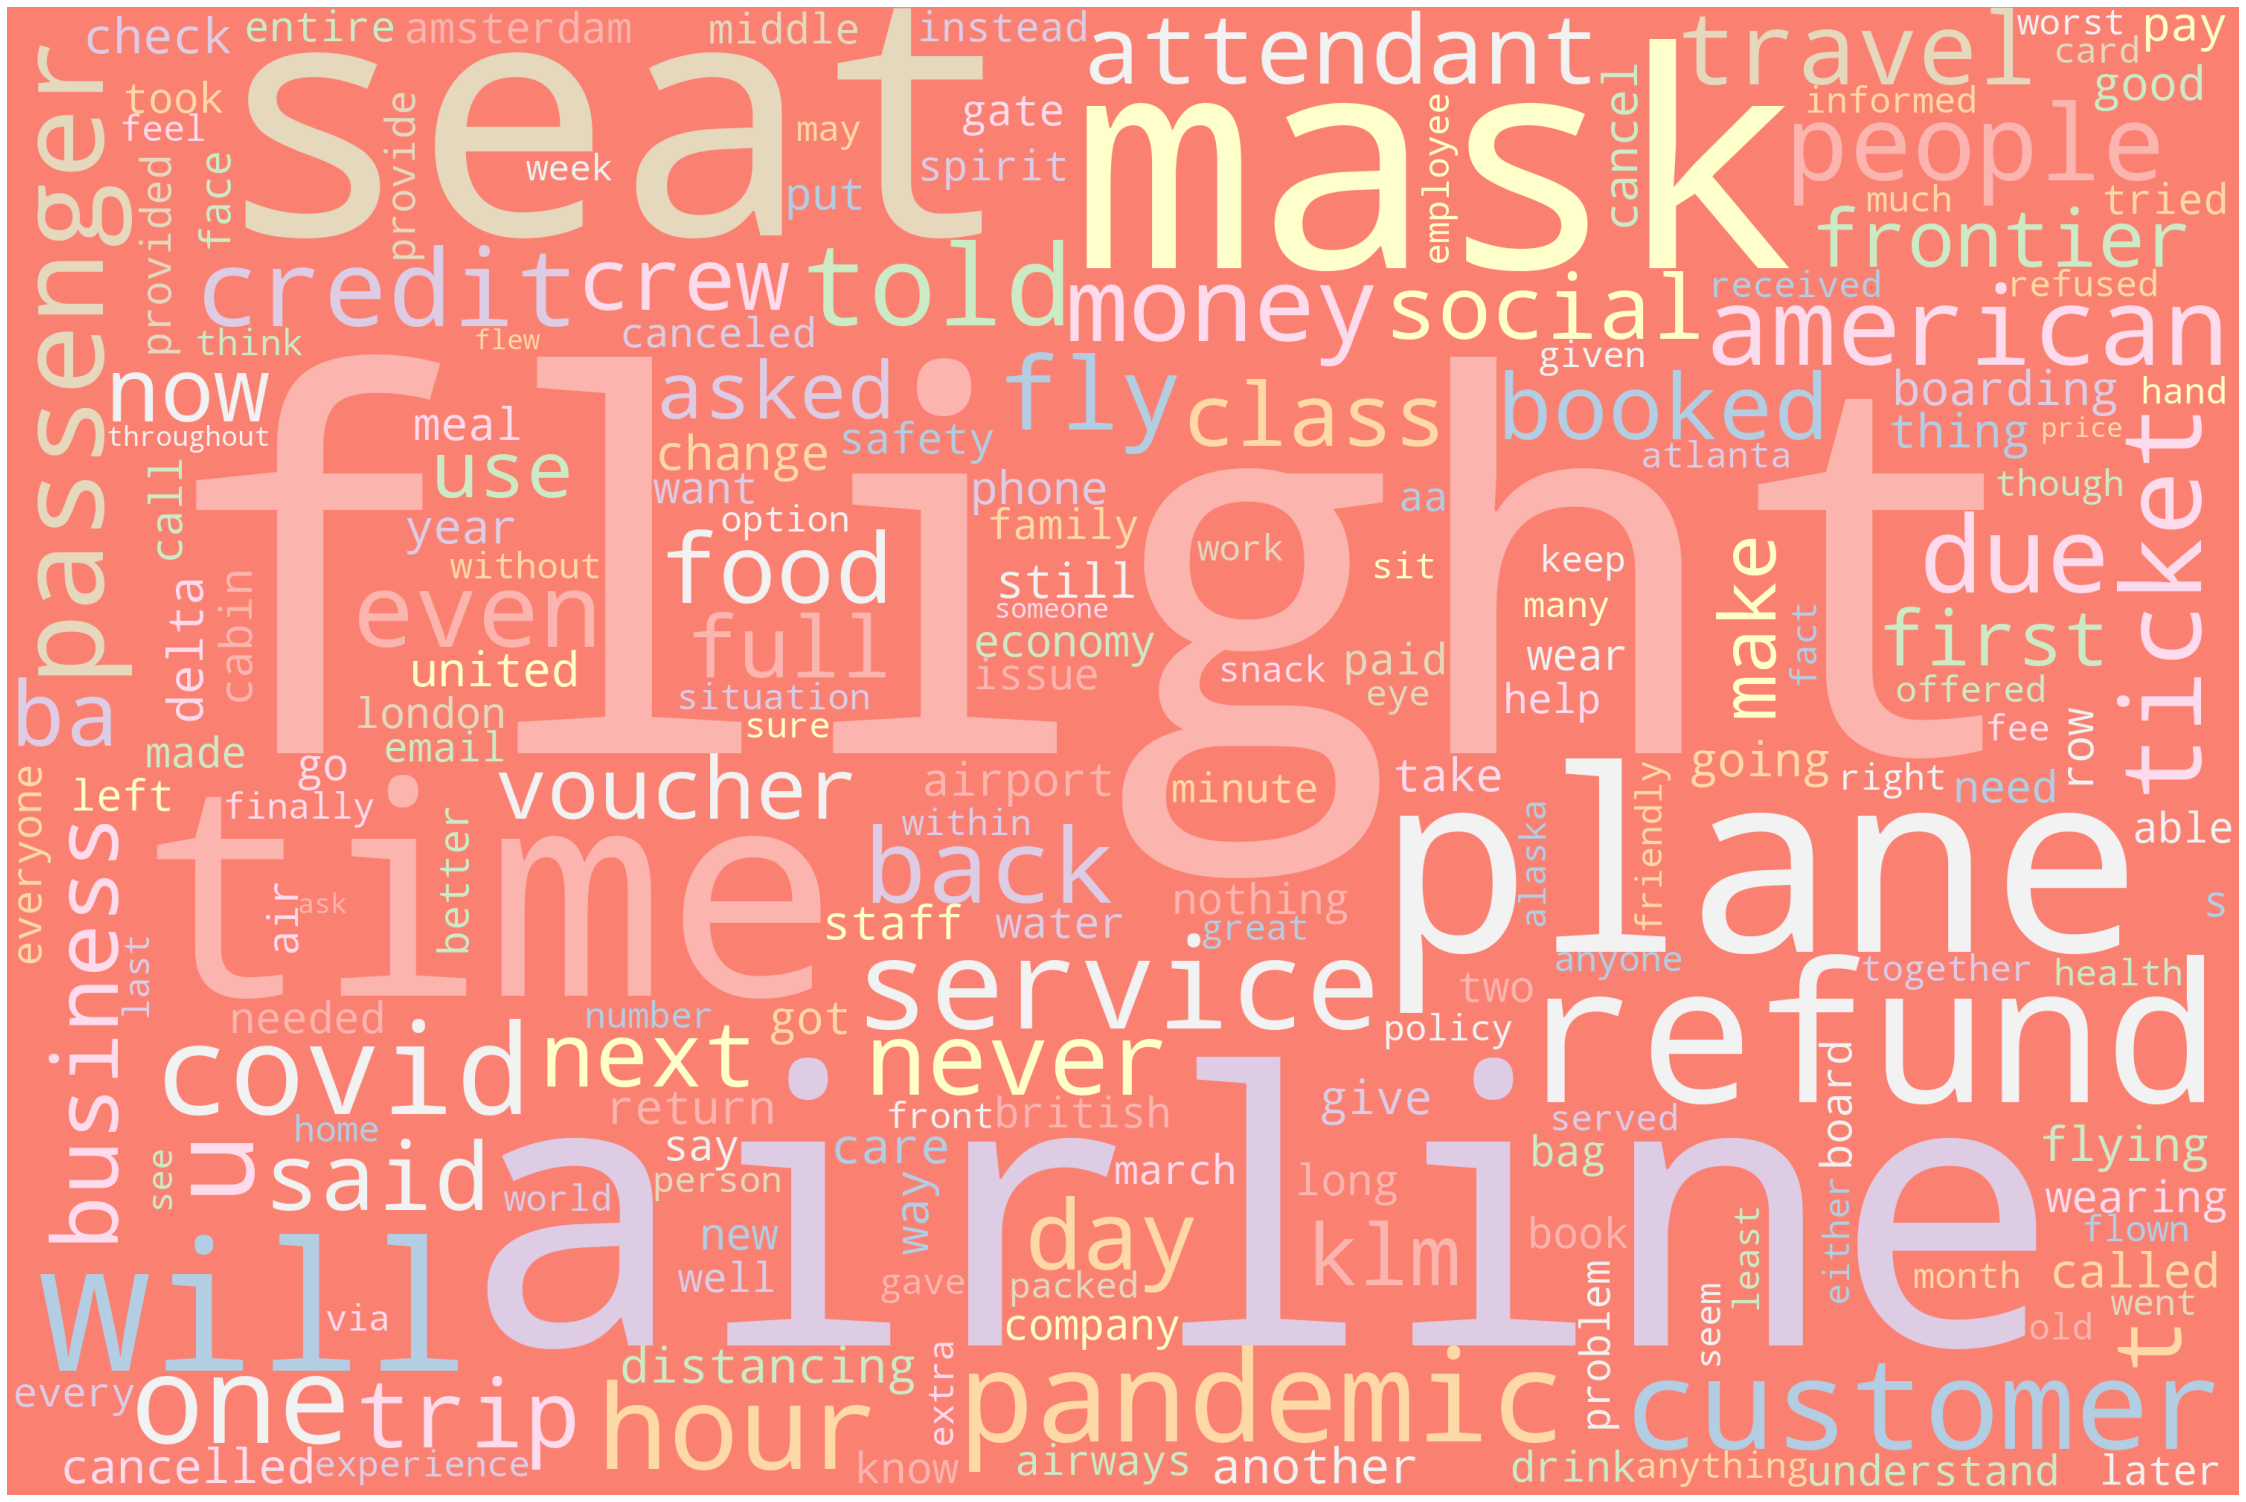

In [86]:
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state=1, 
                      background_color='salmon', 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(review_string)
plot_cloud(wordcloud)

### Adjusting wordcloud and reduce frequency of unwanted meaningless high frequency words

In [87]:
words_unwanted = ['flight', 'airline', 'told', 'customer', 'passenger', 'will']
querywords = review_string.split()

resultwords  = [word for word in querywords if word not in words_unwanted]
result = ' '.join(resultwords)

print(result)

i was deeply unimpressed with the lack of social distancing on my flight. the plane to london was 90% or more full, and no social distancing could be applied. a number of people wearing face masks incorrectly (over mouth or as a chinstrap) throughout the flight, and there was a fair amount of time when masks were off for the free snack (small bag of crisps and 250ml of water). it seems crazy to allow a considerate amount of time with masks off or inappropriately worn in such a small space with no safe distance whatsoever. also, only the absolute minimum of service which, given covid, is understandable but makes the really boring - or not, since some excitement was provided by turbulence, with very little information from the deck. disembarkation was chaotic to say the least but terminal 5 was empty and vast enough to allow to finally distance. an upgrade for 89 euros one was was available but it didn't seem to make sense. at least they departed on time and the plane appeared reasonably

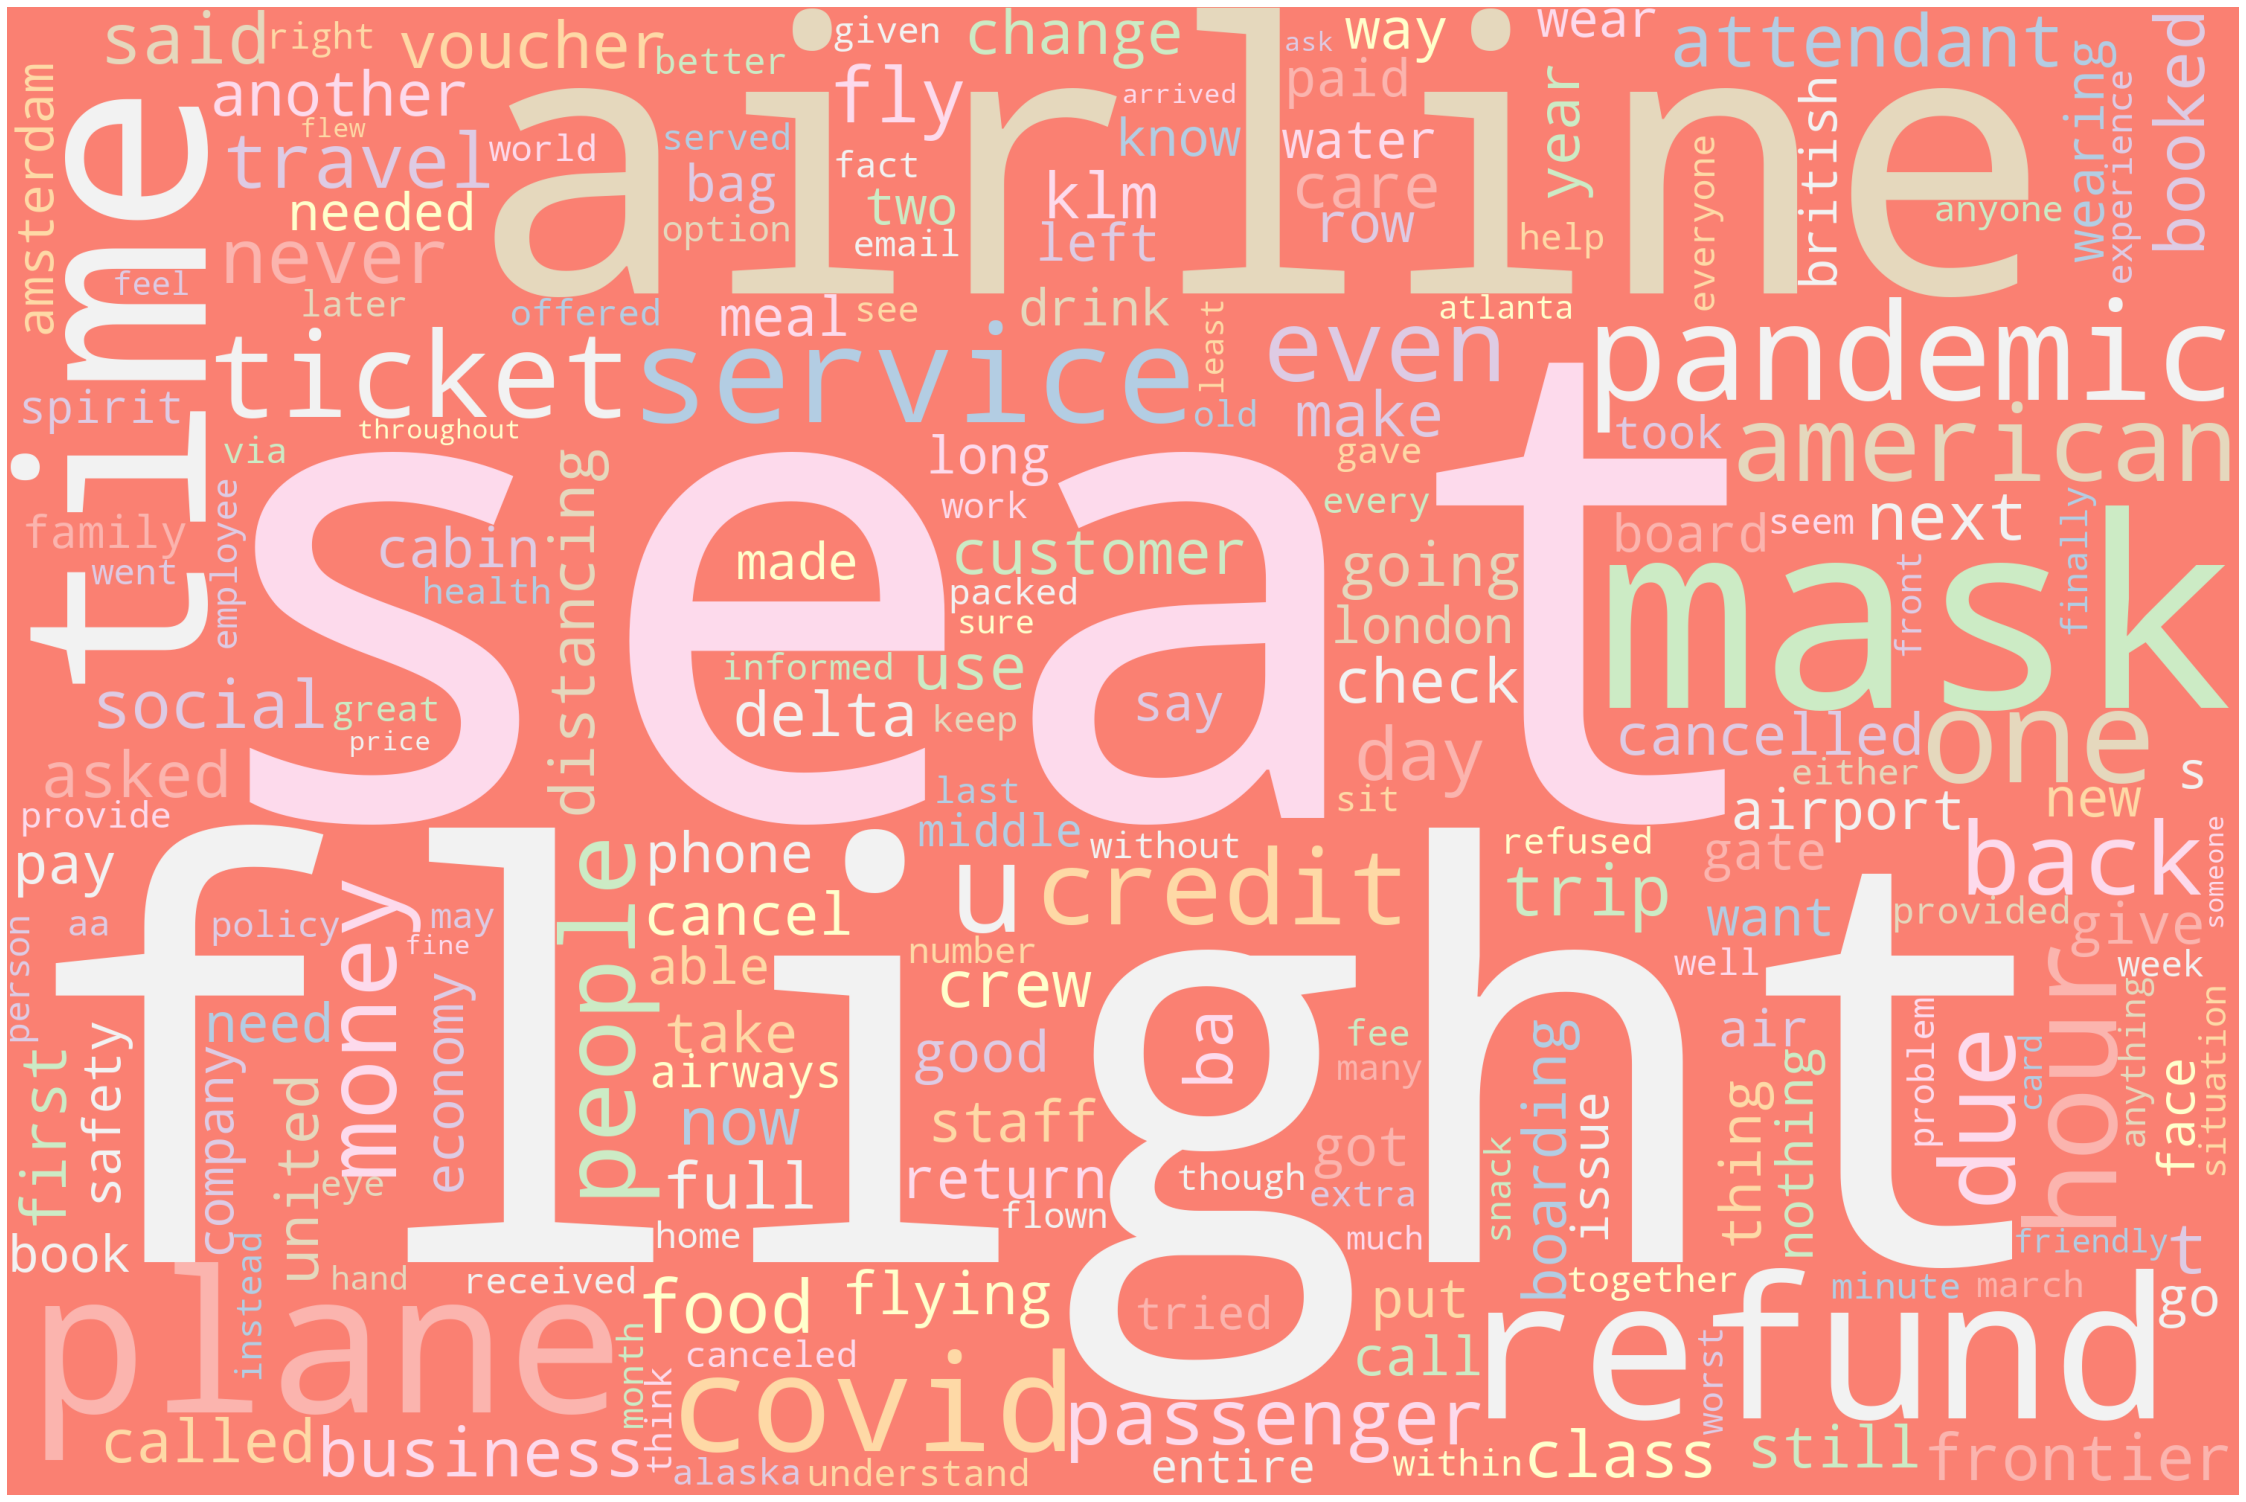

In [88]:
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state=1, 
                      background_color='salmon', 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(result)
plot_cloud(wordcloud)

### Just for fun:

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
mask = np.array(Image.open('/Users/peiliu/Documents/MSBA Courses/Fall Qt 2020/BANA 212 Data and Analytics for Analytics /212 Final Project/3.png'))

In [ ]:
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42)
wc.generate(review_string)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## 4. EDA Visualizations  & Business Insights 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


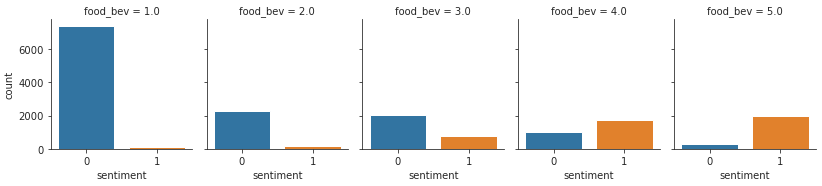

In [105]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("sentiment",
                   col="food_bev",
                   col_wrap=6,
                   data=df,
                   kind="count",
                   height=2.5,
                   aspect=.9)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


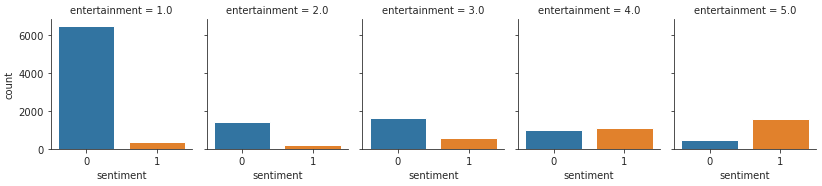

In [106]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("sentiment",
                   col="entertainment",
                   col_wrap=6,
                   data=df,
                   kind="count",
                   height=2.5,
                   aspect=.9)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


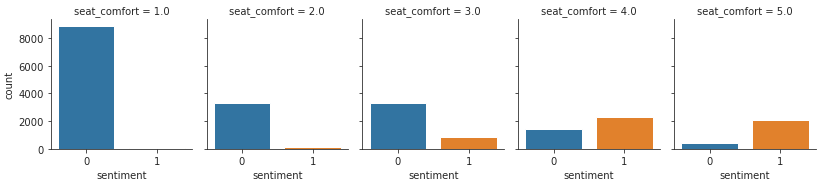

In [107]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("sentiment",
                   col="seat_comfort",
                   col_wrap=6,
                   data=df,
                   kind="count",
                   height=2.5,
                   aspect=.9)

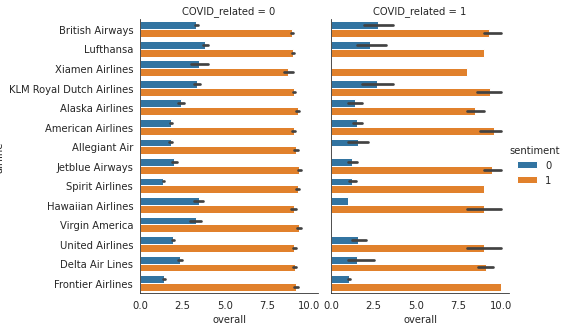

In [108]:
with sns.axes_style('white'):
    g = sns.catplot(x="overall",
                   y="airline",
                   hue="sentiment",
                   col="COVID_related", data=df, kind="bar", height=4.5, aspect=.8)

## Part 3. Modeling

### 1. Clean Review Text

In [91]:
def CleanText(text):
    
    # Remove non-character
    letters = re.sub("[^a-zA-Z]", " ", text)
    
    # Convert to lower case
    lower = letters.lower().split()
    
    # Remove stopwords
    stops = set(stopwords.words("english"))
    words = [w for w in lower if not w in stops]
    
    # Lemmatization 
    lemmatizer=WordNetLemmatizer()
    root = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(root)

In [92]:
df['cleaned_review'] = df['reviews_only'].apply(lambda x: CleanText(x))

### 2. Split Training & Testing Dataset

In [93]:
X = df['cleaned_review']
Y = df['sentiment']

X_Train, X_test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=225)
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_Train, test_size=0.2, random_state=225)

In [94]:
print(len(X_train), len(X_val), len(X_Train), len(X_test))

15364 3841 19205 4802


## 3. Vectorization

In [96]:
# CountVector 
countVect = CountVectorizer()
X_train_countVect = countVect.fit_transform(X_train)
X_val_countVect = countVect.transform(X_val)

# TFIDF 
tfidf = TfidfVectorizer(min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

## Baseline Model - Logistic Regression 

In [97]:
print('Result Using CountVector:')
lr = LogisticRegression(random_state=42, max_iter = 300)
lr.fit(X_train_countVect, Y_train)
Y_pred = lr.predict(X_val_countVect)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))

print('\n\n')
print('Result Using TFIDF:')
lr = LogisticRegression(random_state=42, max_iter = 300)
lr.fit(X_train_tfidf, Y_train)
Y_pred = lr.predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))


Result Using CountVector:

Accuracy on validation set: 0.9078

AUC score : 0.8629

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2977
           1       0.80      0.78      0.79       864

    accuracy                           0.91      3841
   macro avg       0.87      0.86      0.87      3841
weighted avg       0.91      0.91      0.91      3841


Confusion Matrix : 
 [[2812  165]
 [ 189  675]]



Result Using TFIDF:

Accuracy on validation set: 0.9156

AUC score : 0.8519

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2977
           1       0.87      0.74      0.80       864

    accuracy                           0.92      3841
   macro avg       0.90      0.85      0.87      3841
weighted avg       0.91      0.92      0.91      3841


Confusion Matrix : 
 [[2881   96]
 [ 228  636]]


### TFIDF has a higher accuracy and f1 score for class 1, use tfidf

## GridSearch CV Using Accuracy 
### Find the best TFIDF vectoriztion

In [98]:
print('min_df = 3')
tfidf = TfidfVectorizer(min_df=3)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

lr = LogisticRegression(random_state=42, max_iter = 300)
lr.fit(X_train_tfidf, Y_train)
Y_pred = lr.predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))

min_df = 3

Accuracy on validation set: 0.9156

AUC score : 0.8515

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2977
           1       0.87      0.73      0.80       864

    accuracy                           0.92      3841
   macro avg       0.90      0.85      0.87      3841
weighted avg       0.91      0.92      0.91      3841


Confusion Matrix : 
 [[2882   95]
 [ 229  635]]


In [99]:
print('min_df = 1')
tfidf = TfidfVectorizer(min_df=1)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

lr = LogisticRegression(random_state=42, max_iter = 300)
lr.fit(X_train_tfidf, Y_train)
Y_pred = lr.predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))

min_df = 1

Accuracy on validation set: 0.9146

AUC score : 0.8496

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2977
           1       0.87      0.73      0.79       864

    accuracy                           0.91      3841
   macro avg       0.90      0.85      0.87      3841
weighted avg       0.91      0.91      0.91      3841


Confusion Matrix : 
 [[2881   96]
 [ 232  632]]


### TFIDF with min_df = 3 has a higher accuracy 

In [100]:
tfidf = TfidfVectorizer(min_df=3)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [101]:
# Weighted Logistic Regression
wlr = LogisticRegression(random_state=42, n_jobs = -1)

class_weight = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:0.1,1:1}, {0:1,1:10}, {0:1,1:100}]
hyperparameters = dict(class_weight = class_weight)

clf = GridSearchCV(wlr, hyperparameters, scoring = 'accuracy', cv=5, verbose=0, n_jobs =-1)
clf.fit(X_train_tfidf, Y_train)
best_model_wlr = clf.best_estimator_
print(clf.best_params_, clf.best_score_)

Y_pred = best_model_wlr.predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))

{'class_weight': {0: 1, 1: 1}} 0.9036713834879053

Accuracy on validation set: 0.9156

AUC score : 0.8515

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2977
           1       0.87      0.73      0.80       864

    accuracy                           0.92      3841
   macro avg       0.90      0.85      0.87      3841
weighted avg       0.91      0.92      0.91      3841


Confusion Matrix : 
 [[2882   95]
 [ 229  635]]


In [102]:
# Naive Bayes 
mnb = MultinomialNB()

alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
hyperparameters = dict(alpha = alpha)

clf = GridSearchCV(mnb, hyperparameters, scoring = 'accuracy', cv=5, verbose=0, n_jobs =-1)
clf.fit(X_train_tfidf, Y_train)
best_model_mnb = clf.best_estimator_
Y_pred = best_model_mnb .predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))


Accuracy on validation set: 0.8722

AUC score : 0.8013

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      2977
           1       0.74      0.67      0.70       864

    accuracy                           0.87      3841
   macro avg       0.82      0.80      0.81      3841
weighted avg       0.87      0.87      0.87      3841


Confusion Matrix : 
 [[2769  208]
 [ 283  581]]


In [103]:
### Random Forest 
rf = RandomForestClassifier(n_jobs = -1)
estimators=[10,50,100,500]
depths=[4,8,10,20] 
hyperparameters = dict(n_estimators=estimators, max_depth=depths)

clf = GridSearchCV(rf, hyperparameters, scoring = 'accuracy', cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train_tfidf, Y_train)
best_model_rf = clf.best_estimator_
Y_pred = best_model_rf.predict(X_val_tfidf)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(Y_val, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_val, Y_pred)))
print("\nClassification report : \n", classification_report(Y_val, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_val, Y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   34.7s finished



Accuracy on validation set: 0.8386

AUC score : 0.6523

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      2977
           1       0.91      0.31      0.47       864

    accuracy                           0.84      3841
   macro avg       0.87      0.65      0.69      3841
weighted avg       0.85      0.84      0.81      3841


Confusion Matrix : 
 [[2950   27]
 [ 593  271]]


## Logistic Regression with TFIDF Vectorization (min_df = 3) has the highest accuracy

### see its result on the test set

In [104]:
tfidf = TfidfVectorizer(min_df=3)
X_Train_tfidf = tfidf.fit_transform(X_Train)
X_test_tfidf = tfidf.transform(X_test)

best_model = LogisticRegression(random_state=42, max_iter = 300)
lr.fit(X_Train_tfidf, Y_Train)
Y_pred = lr.predict(X_test_tfidf)
print ("\nAccuracy on test set: {:.4f}".format(accuracy_score(Y_test, Y_pred)))
print("\nAUC score : {:.4f}".format(roc_auc_score(Y_test, Y_pred)))
print("\nClassification report : \n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(Y_test, Y_pred))


Accuracy on test set: 0.9173

AUC score : 0.8657

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      3681
           1       0.86      0.77      0.81      1121

    accuracy                           0.92      4802
   macro avg       0.90      0.87      0.88      4802
weighted avg       0.92      0.92      0.92      4802


Confusion Matrix : 
 [[3543  138]
 [ 259  862]]
